## Step 1. 스티커 구하기 or 만들기  

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

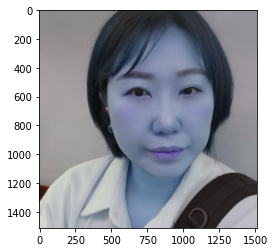

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

# 데이터셋을 pandas로 불러오기
import os
my_image_path = os.getenv("HOME") +"/aiffel/camera_sticker/images/img2.png"

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)


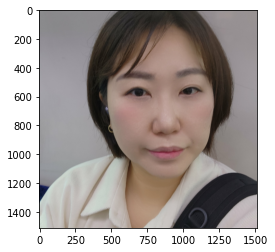

In [2]:
# plt.imshow 이전에 RGB 이미지로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show() # 이미지 실제 출력

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

bounding box 

In [3]:
# face detection
# detector_hog를 이용해서 얼굴의 bounding box 추출
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #  opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid) , 이미지 피라미드의 수는 


rectangles[[(425, 337) (1224, 1136)]]


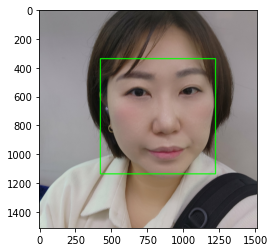

In [4]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    # dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()

 landmark의 위치

In [5]:
model_path = os.getenv("HOME") +"/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat"
print(model_path)

# 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)


/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat


In [6]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))


68


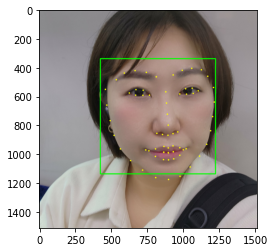

In [7]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


#### 코 끝인 33 번보다 좋은 위치 >> 30 번 코 중앙 사용
#### 고양이 수염이 적용 될 위치를 landmark + dlib_rect.height() // 2 

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코 중앙의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1]  + dlib_rect.height() // 2    ################## 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(896, 798)
(x,y) : (896,1198)
(w,h) : (800,800)


얼굴이미지의 코끝 중앙의 중심점이 (896, 798)

## Step 4. 스티커 적용하기 

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.


In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path ) 
img_sticker = cv2.resize(img_sticker, (w , h))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(800, 800, 3)


In [11]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.

refined_x = x - w // 2
refined_y = y - h 

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남


(x,y) : (496,398)


In [12]:
# 스티커의 이미지가 영역을 벗어남

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (496,398)


스티커의 시작점이 얼굴 사진의 영역을 벗어나지 않음.

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


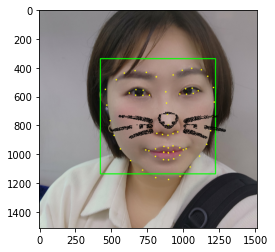

In [14]:

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


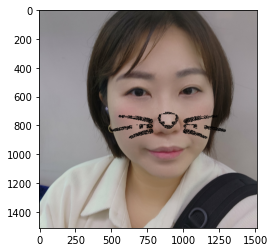

In [15]:
#최종출력

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.


In [ ]:
#최종출력 --> 안됨

# 이미지 불러오기
img1 = img_rgb
img2 = img_bgr

# 두 이미지의 크기 확인
print("Image 1 shape:", img1.shape)
print("Image 2 shape:", img2.shape)


# np.where()를 사용하여 두 이미지를 결합
result = np.where(img1 > img2, img1, img2)

# cv2.addWeighted()를 사용하여 두 이미지를 가중치 합성
alpha = 0.5
beta = 0.5
gamma = 0
weighted_result = cv2.addWeighted(img1, alpha, img2, beta, gamma)

# 결과 이미지 보기
cv2.imshow('Result using np.where()', result)
cv2.imshow('Result using cv2.addWeighted()', weighted_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Step 5. 문제점 찾아보기
* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?  
  -> 각도에 따라 스티커도 축에따라 회전된 이미지면 더욱 자연수럽겠다
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?  
  -> 얼굴의 랜드마크를 찾기 어려움.  
* 실행 속도가 중요할까요?  
  -> 너무 느리면 사용하기 힘드니까? 무슨 실행속도인지 이해 못했음
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?  
  -> 랜드마크의 정확도에따라 수동으로 위치조정을 하지 않아도 되니까 사용자에겐 편리할것 같음

## 리뷰

* 스티커의 위치 ( y 값 계산) 하는 부분이 어려웠다.  

* 마지막 cv2.addWeighted() 를 이해 못함   
